# Exercícios Aula 15/03/2024

## Exercício 2

Reescreva em Python, usando a gramática dos gráficos implementada no pacote plotnine [23], os códigos em R no:
* exemplo na Seção 8.1 na referência [29].
* exemplo explorado na Seção 3.5.3.
* caso 1 da Seção 10.1 na eferência [29].
* caso 2 descrito na Seção 10.5 na referência [29].

Explique na documentação Markdown os passos aplicados na geração de cada gráfico. Os três conjuntos de dados usados podem ser, respectivamente, carregados seguindo o seguinte procedimento:

**murders:** Baixe de https://www.dca.fee.unicamp.br/cursos/IA376I/datasets/murders.csv e carregá-lo com o comando

```
import pandas as pd
murders = pd.read_csv("<caminho>/murders.csv")
```

Obs.: O conjunto de dados murders é do pacote dslabs de R. Uma outra alternativa para carregá-lo em Python é usar comandos R no ambiente Python via rpy2 conforme mostrado na Seção 2.4.

**diamonds :** E integrado no pacote **plotnine**. Basta carregá-lo com a linha de comando from
```
plotnine.data import diamonds
```

**gapminder :** Deve-se instalá-lo e carregá-lo usando os comandos 
```
pip install gapminder
from gapminder import gapminder
```

Para verificar as características carregadas, use o comando
```
gapminder.head()
```


### Resolução das tarefas: exemplo na Seção 8.1 na referência [29]

Importação das bibliotecas e base de dados

In [1]:
import pandas as pd
from plotnine import *

murders = pd.read_csv("murders.csv")

Teste de visualização dos dados

In [2]:
murders['population'] = pd.to_numeric(murders['population'])
murders['population_mn'] = murders['population'] / 10**6
murders.head()

,state,abb,region,population,total,population_mn
0,Alabama,AL,South,4779736,135,4.779736
1,Alaska,AK,West,710231,19,0.710231
2,Arizona,AZ,West,6392017,232,6.392017
3,Arkansas,AR,South,2915918,93,2.915918
4,California,CA,West,37253956,1257,37.253956


Criando o objeto do gráfico:

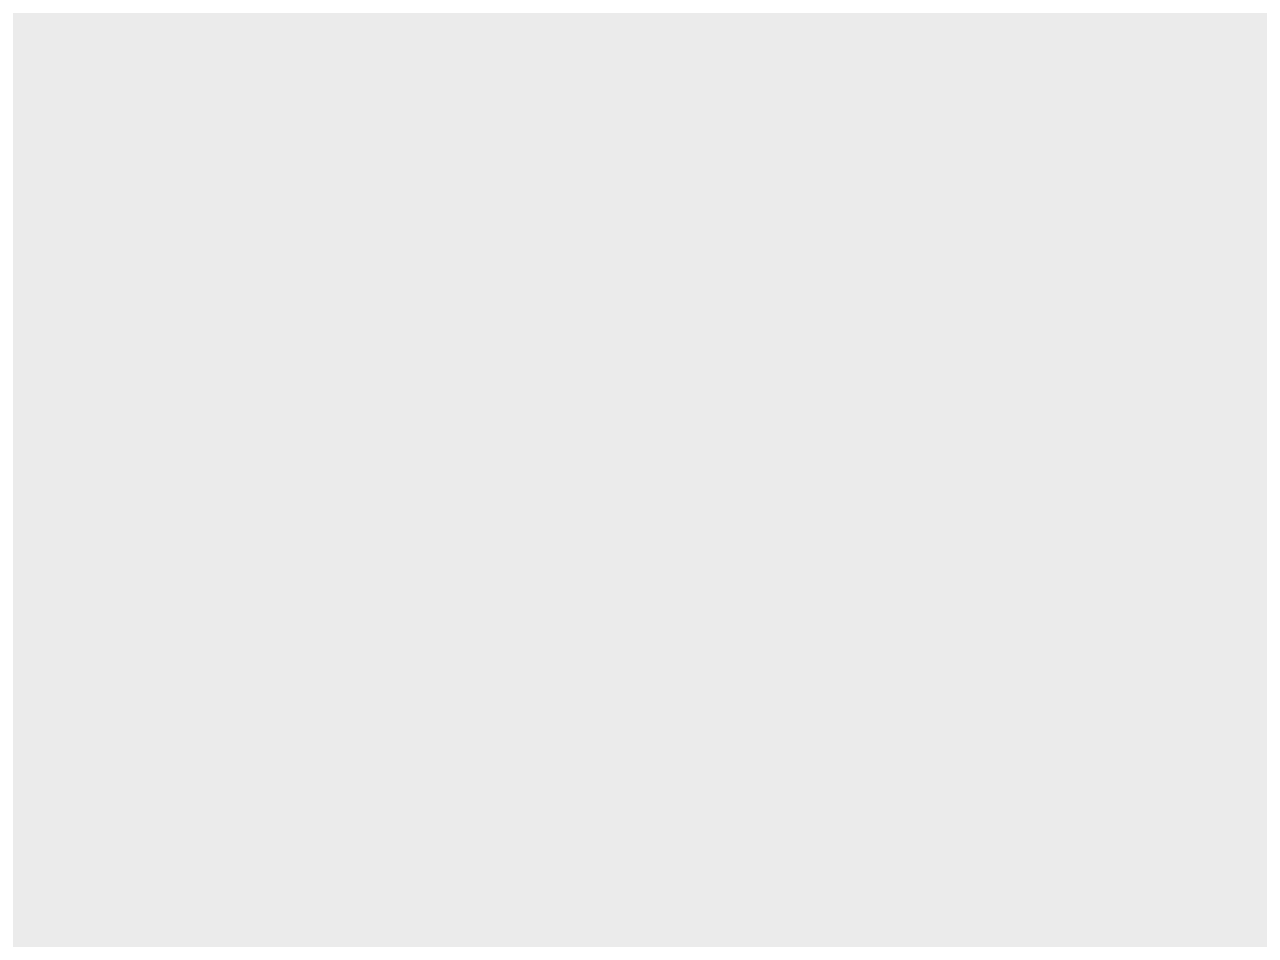

In [3]:
graph = ggplot(data=murders)
graph

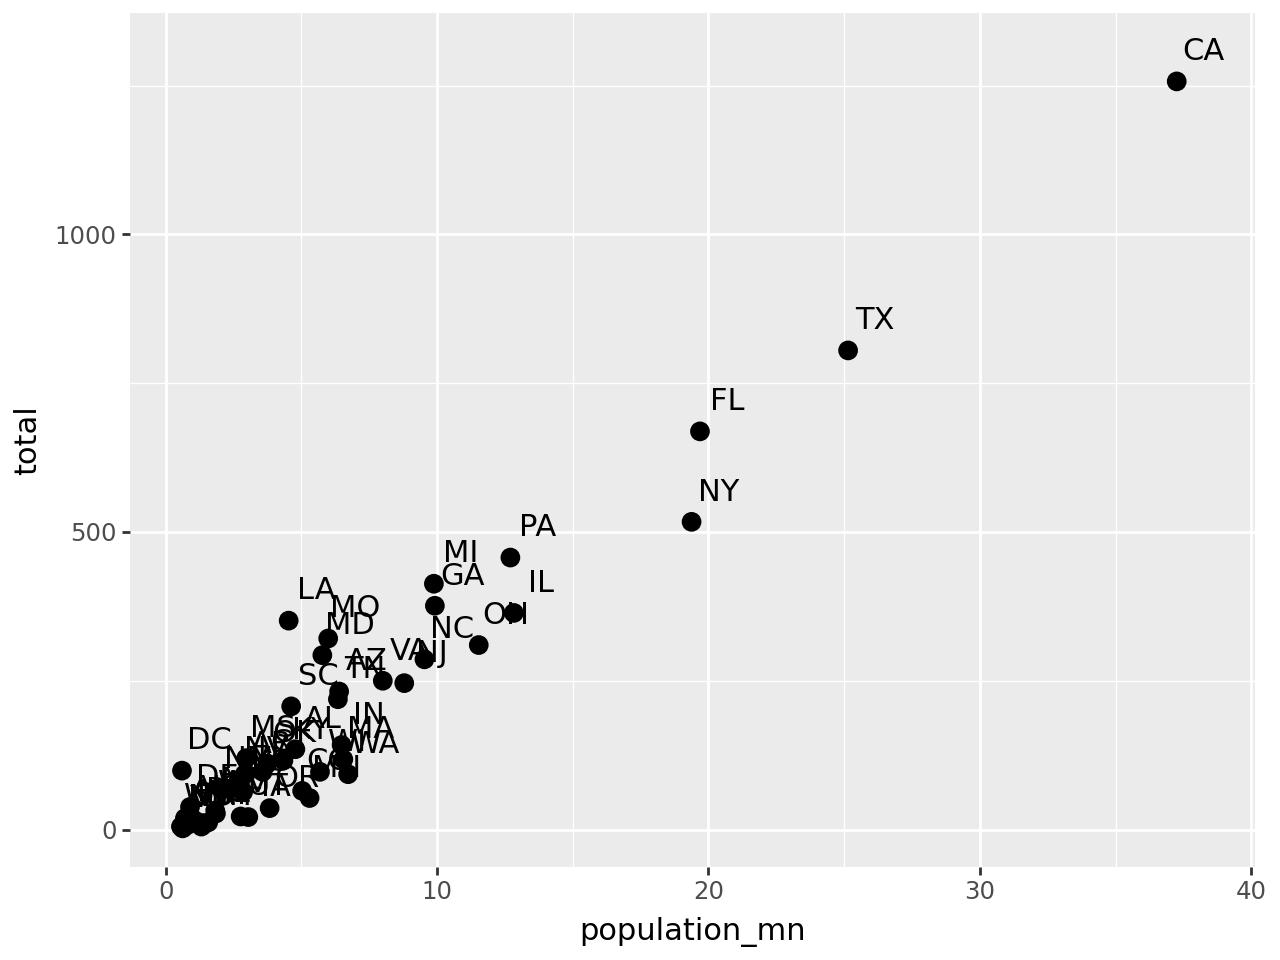

In [5]:
(
    graph + geom_point(aes(x="population_mn", y="total"), size=3) +
    geom_text(aes("population_mn", "total", label="abb" ), nudge_y=50.0, nudge_x=1.0)
)

## Resolução do item 4

Importação das bibliotecas e dados

In [ ]:
from gapminder import gapminder

Teste do dataset

In [ ]:
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


Filtra os dados

In [ ]:
gapminder.query("year == 2002")
gapminder.query("year==2002 and (country == 'Angola' or country == 'Zimbabwe')")[["country", "lifeExp"]]


,country,lifeExp
46,Angola,41.003
1702,Zimbabwe,39.989


In [ ]:
gapminder.insert(6, "dollars_per_day", gapminder['gdpPercap']/365)

,country,continent,year,lifeExp,pop,gdpPercap,dollars_per_day
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,2.135467
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,2.248912
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,2.337262
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,2.290951
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,2.027345
...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,1.934678
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,1.899783
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,2.171096
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,1.841202


In [ ]:
gapminder = gapminder.query('year == 1972')
gapminder = gapminder.dropna(subset=['gdpPercap'])
gapminder

,country,continent,year,lifeExp,pop,gdpPercap,dollars_per_day
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,2.027345
16,Albania,Europe,1972,67.690,2263554,3313.422188,9.077869
28,Algeria,Africa,1972,54.518,14760787,4182.663766,11.459353
40,Angola,Africa,1972,37.928,5894858,5473.288005,14.995310
52,Argentina,Americas,1972,67.065,24779799,9443.038526,25.871338
...,...,...,...,...,...,...,...
1648,Vietnam,Asia,1972,50.254,44655014,699.501644,1.916443
1660,West Bank and Gaza,Asia,1972,56.532,1089572,3133.409277,8.584683
1672,"Yemen, Rep.",Asia,1972,39.848,7407075,1265.047031,3.465882
1684,Zambia,Africa,1972,50.107,4506497,1773.498265,4.858899


In [1]:
from plotnine import ggplot, aes, geom_histogram
ggplot(data=gapminder) + geom_histogram(mapping = aes(x="dollars_per_day"), data=gapminder, binwidth=5)

NameError: name 'gapminder' is not defined